In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [2]:
def get_lower_and_upper_bounds(series, df, multiplier=1.5):
    '''
    This function takes in a series and a multiplier and returns series items that are greater than the multiplier
    times the interquartile range above the 75th percentile and less than the multiplier times the interquartile range
    below the 25th percentile
    '''
    # get value at the 25th percentile
    q1 = df[series].quantile(0.25)
    # get value at the 75th percentile
    q3 = df[series].quantile(0.75)
    # calculate interquartile range
    iqr = q3 - q1
    # calculate upper and lower limits for the whiskers
    lower_limit = q1 - (multiplier * iqr)
    upper_limit = q3 + (multiplier * iqr)
    # get outliers outside this range
    upper_outliers = df[(df[series] > upper_limit)]
    lower_outliers = df[(df[series] < lower_limit)]
    
    return upper_outliers, lower_outliers

# Exercise 1

Using lemonade.csv dataset and focusing on continuous variables:

In [3]:
# pull in data
df = pd.read_csv('https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv')
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         365 non-null    object 
 1   Day          365 non-null    object 
 2   Temperature  365 non-null    float64
 3   Rainfall     365 non-null    float64
 4   Flyers       365 non-null    int64  
 5   Price        365 non-null    float64
 6   Sales        365 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 20.1+ KB


## Exercise 1a

Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?

In [5]:
# loop through columns and for each column that is not object datatype use function to get outliers
for col in df.columns: 
    if df[col].dtype != 'object': 
        upper_outliers, lower_outliers = get_lower_and_upper_bounds(col, df=df, multiplier=1.5)
        print(col) 
        print(lower_outliers) 
        print('-------------------') 

Temperature
         Date     Day  Temperature  Rainfall  Flyers  Price  Sales
364  12/31/17  Sunday         15.1       2.5       9    0.5      7
-------------------
Rainfall
Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: []
-------------------
Flyers
         Date      Day  Temperature  Rainfall  Flyers  Price  Sales
324  11/21/17  Tuesday         47.0      0.95     -38    0.5     20
-------------------
Price
Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: []
-------------------
Sales
Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: []
-------------------


#### The temperature outlier makes sense based on the date so I would keep that. The number of flyers does not make sense so is likely a typo and should be 38. Rainfall, price, and sales do not have any lower outliers.

## Exercise 1b

Use the IQR Range Rule and the upper and upper bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these upper outliers make sense? Which outliers should be kept?

In [6]:
# loop through columns and for each column that is not object datatype use function to get outliers
for col in df.columns: 
    if df[col].dtype != 'object': 
        upper_outliers, lower_outliers = get_lower_and_upper_bounds(col, df=df, multiplier=1.5)
        print(col) 
        print(upper_outliers) 
        print('-------------------') 

Temperature
       Date       Day  Temperature  Rainfall  Flyers  Price  Sales
41  2/11/17  Saturday        212.0      0.91      35    0.5     21
-------------------
Rainfall
         Date        Day  Temperature  Rainfall  Flyers  Price  Sales
0      1/1/17     Sunday         27.0      2.00      15    0.5     10
1      1/2/17     Monday         28.9      1.33      15    0.5     13
2      1/3/17    Tuesday         34.5      1.33      27    0.5     15
5      1/6/17     Friday         25.3      1.54      23    0.5     11
6      1/7/17   Saturday         32.9      1.54      19    0.5     13
10    1/11/17  Wednesday         32.6      1.54      23    0.5     12
11    1/12/17   Thursday         38.2      1.33      16    0.5     14
12    1/13/17     Friday         37.5      1.33      19    0.5     15
15    1/16/17     Monday         30.6      1.67      24    0.5     12
16    1/17/17    Tuesday         32.2      1.43      26    0.5     14
19    1/20/17     Friday         31.6      1.43      20

#### A temperature of 212 is obviously an error and likely a typo. I would probably change it to 21 based on the temperature for prior days. The rainfall does not seem unusual other than maybe just a rainy year so I would keep that. The number of flyers and total sales is also not unusual considering it is during the hottest period of the year. I might question sales of 534 as that is quite a bit more than the others, however, it happened on July 4th so they might have been selling at some event with a lot of attendees.

## Exercise 1c

Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense? Which outliers should be kept?

In [7]:
# loop through columns and for each column that is not object datatype use function to get outliers
for col in df.columns: 
    if df[col].dtype != 'object': 
        upper_outliers, lower_outliers = get_lower_and_upper_bounds(col, df=df, multiplier=3)
        print(col) 
        print(lower_outliers) 
        print('-------------------') 

Temperature
Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: []
-------------------
Rainfall
Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: []
-------------------
Flyers
         Date      Day  Temperature  Rainfall  Flyers  Price  Sales
324  11/21/17  Tuesday         47.0      0.95     -38    0.5     20
-------------------
Price
Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: []
-------------------
Sales
Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: []
-------------------


#### The only outlier with a multiplier of 3 is -38 fliers which I would assume to be a typo and change it to 38

## Exercise 1d

Using the multiplier of 3, IQR Range Rule, and the upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

In [8]:
# loop through columns and for each column that is not object datatype use function to get outliers
for col in df.columns: 
    if df[col].dtype != 'object': 
        upper_outliers, lower_outliers = get_lower_and_upper_bounds(col, df=df, multiplier=3)
        print(col) 
        print(upper_outliers) 
        print('-------------------') 

Temperature
       Date       Day  Temperature  Rainfall  Flyers  Price  Sales
41  2/11/17  Saturday        212.0      0.91      35    0.5     21
-------------------
Rainfall
         Date      Day  Temperature  Rainfall  Flyers  Price  Sales
0      1/1/17   Sunday         27.0      2.00      15    0.5     10
338   12/5/17  Tuesday         22.0      1.82      11    0.5     10
343  12/10/17   Sunday         31.3      1.82      15    0.5     11
364  12/31/17   Sunday         15.1      2.50       9    0.5      7
-------------------
Flyers
Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: []
-------------------
Price
Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: []
-------------------
Sales
       Date       Day  Temperature  Rainfall  Flyers  Price  Sales
181  7/1/17  Saturday        102.9      0.47      59    0.5    143
182  7/2/17    Sunday         93.4      0.51      68    0.5    158
183  7/3/17    Monday

#### As mentioned in the previous comment, I would keep all of these other than the temperature which is obviously a typo or error.

In [9]:
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


# Exercise 2

Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

* Use a 2 sigma decision rule to isolate the outliers.

* Do these make sense?

* Should certain outliers be kept or removed?

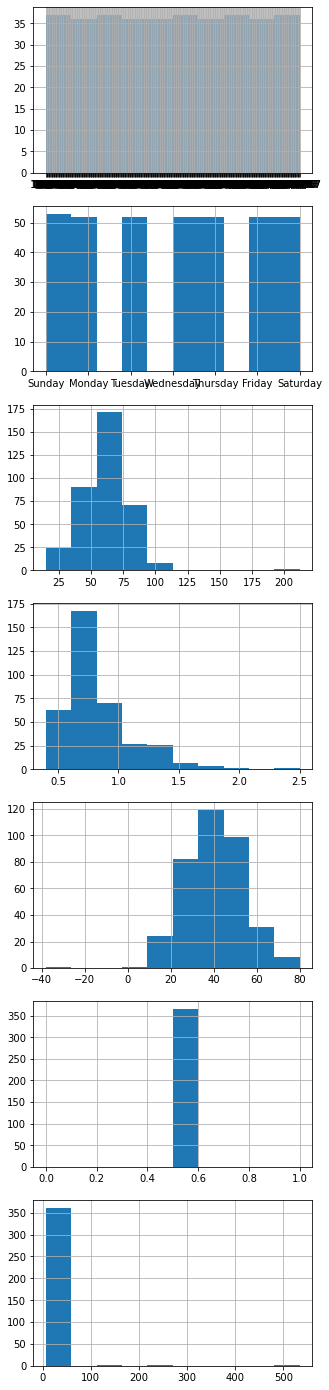

In [10]:
# plot histograms for each of the columns
fig, axs = plt.subplots(len(df.columns), figsize=(5, 25))
for n, col in enumerate(df.columns):
    df[col].hist(ax=axs[n])

#### Temperature, rainfall, and flyers are all fairly normally distributed.

In [12]:
# use assign to create new columns with the zscores for each of the normally distributed columns
df = df.assign(temp_zscore = zscore(df.Temperature), 
               rain_zscore = zscore(df.Rainfall), 
               flyers_zscore = zscore(df.Flyers))
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,temp_zscore,rain_zscore,flyers_zscore
0,1/1/17,Sunday,27.0,2.00,15,0.5,10,-1.894938,4.292372,-1.823427
1,1/2/17,Monday,28.9,1.33,15,0.5,13,-1.789739,1.842779,-1.823427
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15,-1.479680,1.842779,-0.951812
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17,-0.948151,0.819069,-0.879177
4,1/5/17,Thursday,42.4,1.00,33,0.5,18,-1.042276,0.636263,-0.516004


In [13]:
# get all observations where the temperature is greater than two standard deviations from the mean
df[abs(df.temp_zscore) > 2]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,temp_zscore,rain_zscore,flyers_zscore
41,2/11/17,Saturday,212.0,0.91,35,0.5,21,8.348071,0.307213,-0.370735
166,6/16/17,Friday,99.3,0.47,77,0.5,41,2.108141,-1.301475,2.679918
176,6/26/17,Monday,102.6,0.47,60,0.5,42,2.290854,-1.301475,1.445130
181,7/1/17,Saturday,102.9,0.47,59,0.5,143,2.307464,-1.301475,1.372495
190,7/10/17,Monday,98.0,0.49,66,0.5,40,2.036163,-1.228352,1.880937
198,7/18/17,Tuesday,99.3,0.47,76,0.5,41,2.108141,-1.301475,2.607283
202,7/22/17,Saturday,99.6,0.47,49,0.5,42,2.124751,-1.301475,0.646149
207,7/27/17,Thursday,97.9,0.47,74,0.5,43,2.030626,-1.301475,2.462014
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10,-2.171776,3.634273,-2.113965
364,12/31/17,Sunday,15.1,2.50,9,0.5,7,-2.553812,6.120427,-2.259234


#### For temperature, even though more than two standard deviations from the mean, these are not uncommon other than 212. It may just have been a very hot summer and a few cold days during the winter so I would keep these but change 212 to 21.

In [14]:
# get all observations where the rainfall is greater than two standard deviations from the mean
df[abs(df.rain_zscore) > 2]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,temp_zscore,rain_zscore,flyers_zscore
0,1/1/17,Sunday,27.0,2.00,15,0.5,10,-1.894938,4.292372,-1.823427
5,1/6/17,Friday,25.3,1.54,23,0.5,11,-1.989063,2.610562,-1.242350
6,1/7/17,Saturday,32.9,1.54,19,0.5,13,-1.568269,2.610562,-1.532888
10,1/11/17,Wednesday,32.6,1.54,23,0.5,12,-1.584879,2.610562,-1.242350
15,1/16/17,Monday,30.6,1.67,24,0.5,12,-1.695614,3.085856,-1.169715
16,1/17/17,Tuesday,32.2,1.43,26,0.5,14,-1.607026,2.208390,-1.024446
19,1/20/17,Friday,31.6,1.43,20,0.5,12,-1.640247,2.208390,-1.460254
23,1/24/17,Tuesday,28.6,1.54,20,0.5,12,-1.806349,2.610562,-1.460254
337,12/4/17,Monday,34.9,1.54,16,0.5,13,-1.457533,2.610562,-1.750792
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10,-2.171776,3.634273,-2.113965


#### For rain, I would keep all observations as none of these are excessive even though outside two standard deviations from the mean.

In [15]:
# get all observations where the rainfall is greater than two standard deviations from the mean
df[abs(df.flyers_zscore) > 2]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,temp_zscore,rain_zscore,flyers_zscore
166,6/16/17,Friday,99.3,0.47,77,0.5,41,2.108141,-1.301475,2.679918
170,6/20/17,Tuesday,85.1,0.54,70,0.5,37,1.321921,-1.045547,2.171476
171,6/21/17,Wednesday,94.3,0.47,76,0.5,41,1.831303,-1.301475,2.607283
182,7/2/17,Sunday,93.4,0.51,68,0.5,158,1.781472,-1.155230,2.026206
183,7/3/17,Monday,81.5,0.54,68,0.5,235,1.122597,-1.045547,2.026206
194,7/14/17,Friday,92.0,0.50,80,0.5,40,1.703957,-1.191791,2.897821
198,7/18/17,Tuesday,99.3,0.47,76,0.5,41,2.108141,-1.301475,2.607283
203,7/23/17,Sunday,89.1,0.51,72,0.5,37,1.543391,-1.155230,2.316745
204,7/24/17,Monday,83.5,0.57,69,0.5,35,1.233333,-0.935864,2.098841
207,7/27/17,Thursday,97.9,0.47,74,0.5,43,2.030626,-1.301475,2.462014


#### The only observation from flyers I would change is -38 as that is impossible and obviously a typo. All others are reasonable even though outside two standard deviations from the mean.

# Exercise 3

Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv

In [16]:
# get all observations where the temperature is greater than three standard deviations from the mean
df[abs(df.temp_zscore) > 3]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,temp_zscore,rain_zscore,flyers_zscore
41,2/11/17,Saturday,212.0,0.91,35,0.5,21,8.348071,0.307213,-0.370735


In [17]:
# get all observations where the rainfall is greater than three standard deviations from the mean
df[abs(df.rain_zscore) > 3]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,temp_zscore,rain_zscore,flyers_zscore
0,1/1/17,Sunday,27.0,2.00,15,0.5,10,-1.894938,4.292372,-1.823427
15,1/16/17,Monday,30.6,1.67,24,0.5,12,-1.695614,3.085856,-1.169715
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10,-2.171776,3.634273,-2.113965
343,12/10/17,Sunday,31.3,1.82,15,0.5,11,-1.656857,3.634273,-1.823427
364,12/31/17,Sunday,15.1,2.50,9,0.5,7,-2.553812,6.120427,-2.259234


In [18]:
# get all observations where the rainfall is greater than three standard deviations from the mean
df[abs(df.flyers_zscore) > 3]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,temp_zscore,rain_zscore,flyers_zscore
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20,-0.787585,0.453458,-5.67306
